# Classification comparison
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


In [33]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process.kernels import RBF
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import StandardScaler

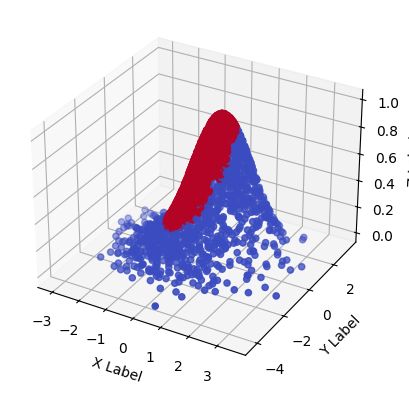

In [37]:
# Creating a synthetic dataset

random.seed(42)

# Create 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Colors definition
colors = {
    0: '#b40426',
    1: '#3b4cc0',
    2: '#f2da0a',
    3: '#fe5200'
    # ... and so on
}

# Generate data
X, y = make_gaussian_quantiles(
    n_features=2, n_classes=2, n_samples=2500, mean=(2, 3))

# if numbr of classes more than 2 change number of clasees from 3 to 2
y = list(map(lambda x: 0 if x >= 2 else x, y))
colors = list(map(lambda x: colors[x], y))


# Scale data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


# Generate Z component
z = RBF(1.0).__call__(X)[0]

# Plot
ax.scatter(X[:, 0], X[:, 1], z, c=colors, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [38]:
print(np.mean(X[:, 0]))
print(np.mean(X[:, 1]))

-8.526512829121202e-16
-5.070432962384075e-15


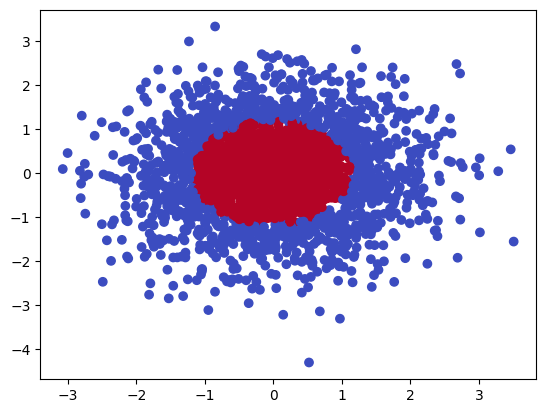

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o')
plt.show()

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from mlxtend.plotting import plot_decision_regions

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=2)

In [42]:
print(f"test/train = {X_test.shape[0]/X.shape[0]}")

test/train = 0.33


In [43]:
# init classifier with RBF kernel
svc = SVC(kernel="rbf", random_state=42)

# fit classifier on training data
svc.fit(X_train, y_train)

SVC(random_state=42)

In [44]:
# evalueate model with accuracy_score
print(
    f"accuracy score on training sample = {accuracy_score(svc.predict(X_train), y_train)}")
print(
    f"accuracy score on test sample = {accuracy_score(svc.predict(X_test), y_test)}")

accuracy score on training sample = 0.9934328358208955
accuracy score on test sample = 0.9806060606060606


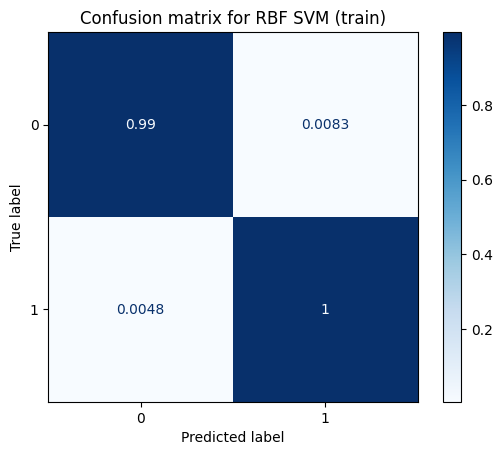

In [49]:
# evalueate model with confusion_matrix
matrix_train = ConfusionMatrixDisplay.from_estimator(
    svc, X_train, y_train,
    normalize='true',  # "pred" , "all", None
    cmap=plt.cm.Blues,)
plt.title('Confusion matrix for RBF SVM (train)')
plt.show(matrix_train)
plt.show()

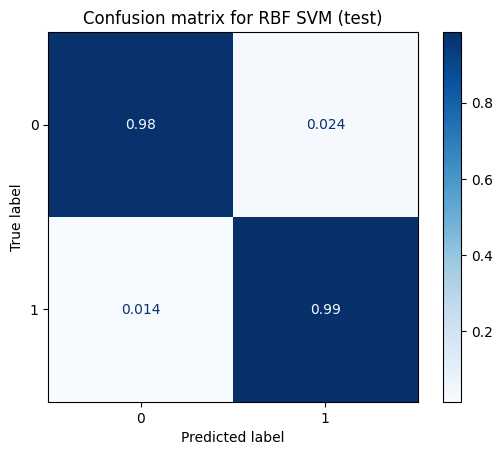

In [50]:
matrix_test = ConfusionMatrixDisplay.from_estimator(
    svc, X_test, y_test,
    normalize='true',  # "pred" , "all", None
    cmap=plt.cm.Blues,)
plt.title('Confusion matrix for RBF SVM (test)')
plt.show(matrix_test)
plt.show()

# Different kernels use cases

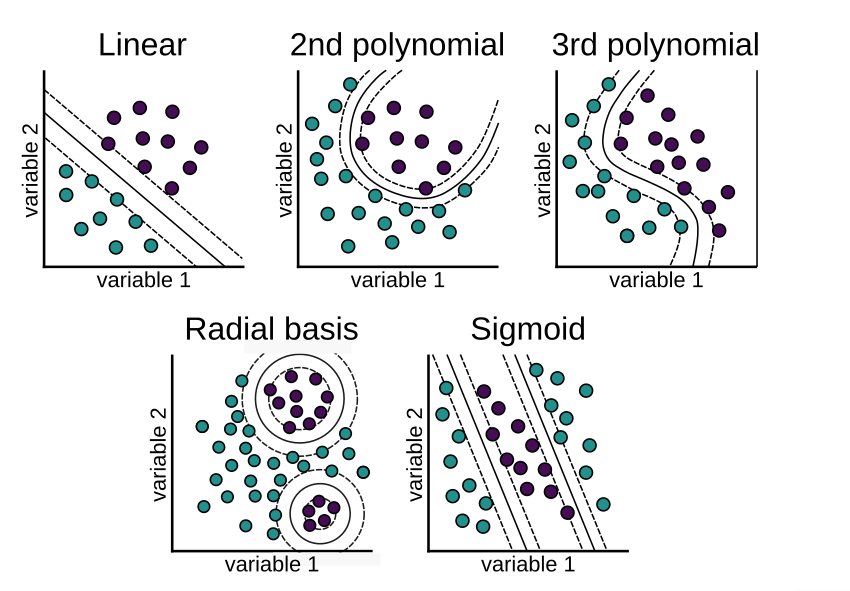

Model accuracy: 0.9806060606060606


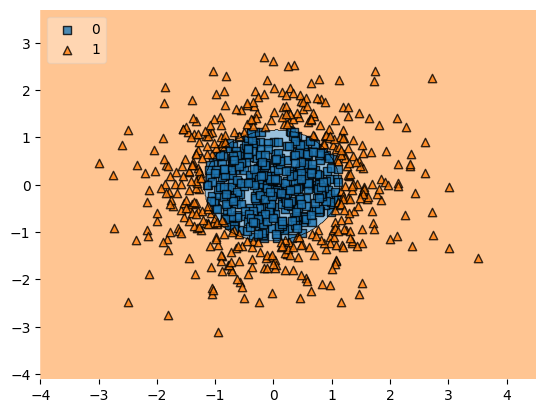

In [48]:
# Generate predictions
y_pred = svc.predict(X_test)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

# Plot decision boundary
plot_decision_regions(X_test, np.array(y_test), clf=svc, legend=2)
plt.show()